# Исследование объявлений о продаже квартир

На основе данных об объявлениях о продаже квартир в Санкт-Петербурге и соседних населенных пунктах за несколько лет необходимо установить параметры, влияющие на стоимость жилья.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

# Оглавление

1. [Знакомство с файлом](#Знакомство)
2. [Предобработка данных](#предобработка)  
3. [Добавляем данные](#новые)  
4. [Исследовательский анализ](#анализ)  
    4.1 [Изучаем основные параметры](#параметры)  
    4.2 [Какие факторы влияют на цену?](#факторы)  
    4.3 [В каких населенных пунктах самые дорогие квартиры](#пункты)  
    4.4 [Рынок недвижимости в Санкт-Петербурге](#питер) 
7. [Общий вывод](#вывод)

# 1. Знакомство с данными <a name="Знакомство"></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')

In [3]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [5]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах(м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении

### При первом взгляде на исходные данные были отмечены следующие нюансы: 
1. есть пропуски в столбцах
    - жилая площадь
    - высота потолков
    - кухонная площадь
    - балконы
    - название населенного пункта
    - расстояние до аэропорта / центра
    - ближайшие парки и водоемы 
2. Есть строки, где кол-во комнат = 0
3. Некоторые потолки слишком высокие  

### В ходе исследования планируется:  
1. Обработать пустые/пропущенные/нулевые значения
2. Изменить тип данных некоторых столбцов: дата публикации, кол-во этажей, апартаменты, кол-во парков и водоемов в радиусе. Это целочисленные значения, с ними будет проще работать.
3. Проверить на наличие дубликатов
4. Добавить новые столбцы:
    - цену квадратного метра;
    - день недели, месяц и год публикации объявления;
    - этаж квартиры;
    - соотношение жилой и общей площади, отношение площади кухни к общей.
4. Посмотреть на распределение параметров, которые пользователи указывают в объявлениях.
5. Проанализировать зависимость цены от ряда факторов:
    - общая площадь
    - этаж
    - кол-во комнат
    - удаленность от центра
6. Вычислить, в каких населенных пунктах больше всего объявлений, и как там различается стоимость
7. Выяснить, как отличается ценообразование в центре Петербурга и за его пределами. 

### Пропуски в данных, скорее всего обусловлены тем, что пользователи либо не указывают всю информацию, либо пропускают, если значение нулевое (например, если нет балконов, аэропорта, парка рядом, просто могут не заполнять поле)
    

# 2. Предобработка данных <a name="предобработка"></a>

### Заменим тип данных столбца с датой публикации, чтобы с ней было проще работать

In [6]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format = '%Y-%m-%dT%H:%M:%S')

In [7]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


### в столбцах "водоемы и парки в радиусе 3км" заменяем пропуски на 0, т.к. раз их не указали, то, скорее всего, их и нет. И меняем формат на целочисленный. То же самое и с балконами.

In [8]:
df['parks_around3000'].fillna(0, inplace = True)

In [9]:
df['parks_around3000'] = df['parks_around3000'].astype('int')

In [10]:
df['ponds_around3000'].fillna(0, inplace = True)

In [11]:
df['ponds_around3000'] = df['ponds_around3000'].astype('int')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        23699 non-null int64
parks_nearest           8079 non-null float64
ponds_aro

In [13]:
df['balcony'].fillna(0, inplace = True)

In [14]:
df['balcony'] = df['balcony'].astype('int')

### Заменим формат столбца is_apartment на булевый

In [15]:
df['is_apartment'] = df['is_apartment'].astype('bool')

### Есть строки, где кол-во комнат = 0. Возможно, нули стоят в квартирах - студиях. Проверим это предположение.

In [16]:
df[df.rooms == 0]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
144,1,2450000.0,27.00,2017-03-30,0,NaN,24.0,15.50,2,True,...,NaN,2,посёлок Мурино,NaN,NaN,0,NaN,0,NaN,181.0
349,4,2320000.0,25.00,2017-09-27,0,NaN,14.0,17.00,1,True,...,NaN,0,деревня Кудрово,NaN,NaN,0,NaN,0,NaN,45.0
440,8,2480000.0,27.11,2018-03-12,0,NaN,17.0,24.75,4,True,...,NaN,2,Санкт-Петербург,38171.0,15015.0,0,NaN,2,982.0,64.0
508,0,3375000.0,34.40,2017-03-28,0,NaN,26.0,24.30,19,True,...,NaN,1,посёлок Парголово,53115.0,19292.0,0,NaN,1,593.0,430.0
608,2,1850000.0,25.00,2019-02-20,0,NaN,10.0,NaN,7,True,...,NaN,0,посёлок Шушары,NaN,NaN,0,NaN,0,NaN,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23210,7,3200000.0,26.00,2017-09-01,0,NaN,25.0,18.00,16,True,...,NaN,0,Санкт-Петербург,11405.0,13222.0,0,NaN,1,623.0,14.0
23442,0,2500000.0,27.70,2017-09-28,0,NaN,24.0,18.00,4,True,...,NaN,2,посёлок Мурино,NaN,NaN,0,NaN,0,NaN,4.0
23554,15,3350000.0,26.00,2018-09-07,0,NaN,19.0,NaN,8,True,...,NaN,0,Санкт-Петербург,18090.0,17092.0,0,NaN,2,112.0,31.0
23592,10,1450000.0,29.00,2017-11-11,0,NaN,9.0,18.00,8,True,...,NaN,2,Никольское,NaN,NaN,0,NaN,0,NaN,82.0


In [17]:
df[df.studio == True]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
144,1,2450000.0,27.00,2017-03-30,0,NaN,24.0,15.50,2,True,...,NaN,2,посёлок Мурино,NaN,NaN,0,NaN,0,NaN,181.0
440,8,2480000.0,27.11,2018-03-12,0,NaN,17.0,24.75,4,True,...,NaN,2,Санкт-Петербург,38171.0,15015.0,0,NaN,2,982.0,64.0
608,2,1850000.0,25.00,2019-02-20,0,NaN,10.0,NaN,7,True,...,NaN,0,посёлок Шушары,NaN,NaN,0,NaN,0,NaN,29.0
697,12,2500000.0,24.10,2017-12-01,0,2.75,25.0,17.50,21,True,...,NaN,0,деревня Кудрово,NaN,NaN,0,NaN,0,NaN,201.0
716,5,1500000.0,17.00,2017-06-07,0,2.70,9.0,12.00,1,True,...,NaN,0,посёлок Шушары,18654.0,29846.0,0,NaN,0,NaN,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22867,8,3090000.0,30.00,2017-12-17,0,NaN,25.0,18.20,5,True,...,NaN,0,Санкт-Петербург,35250.0,16414.0,0,NaN,1,400.0,211.0
22877,2,4280000.0,28.00,2017-10-26,0,2.70,19.0,18.00,10,True,...,NaN,0,Санкт-Петербург,18982.0,7206.0,0,NaN,1,415.0,151.0
23210,7,3200000.0,26.00,2017-09-01,0,NaN,25.0,18.00,16,True,...,NaN,0,Санкт-Петербург,11405.0,13222.0,0,NaN,1,623.0,14.0
23554,15,3350000.0,26.00,2018-09-07,0,NaN,19.0,NaN,8,True,...,NaN,0,Санкт-Петербург,18090.0,17092.0,0,NaN,2,112.0,31.0


In [18]:
df[(df.studio == True) & (df.rooms == 0)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
144,1,2450000.0,27.00,2017-03-30,0,NaN,24.0,15.50,2,True,...,NaN,2,посёлок Мурино,NaN,NaN,0,NaN,0,NaN,181.0
440,8,2480000.0,27.11,2018-03-12,0,NaN,17.0,24.75,4,True,...,NaN,2,Санкт-Петербург,38171.0,15015.0,0,NaN,2,982.0,64.0
608,2,1850000.0,25.00,2019-02-20,0,NaN,10.0,NaN,7,True,...,NaN,0,посёлок Шушары,NaN,NaN,0,NaN,0,NaN,29.0
697,12,2500000.0,24.10,2017-12-01,0,2.75,25.0,17.50,21,True,...,NaN,0,деревня Кудрово,NaN,NaN,0,NaN,0,NaN,201.0
716,5,1500000.0,17.00,2017-06-07,0,2.70,9.0,12.00,1,True,...,NaN,0,посёлок Шушары,18654.0,29846.0,0,NaN,0,NaN,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22867,8,3090000.0,30.00,2017-12-17,0,NaN,25.0,18.20,5,True,...,NaN,0,Санкт-Петербург,35250.0,16414.0,0,NaN,1,400.0,211.0
22877,2,4280000.0,28.00,2017-10-26,0,2.70,19.0,18.00,10,True,...,NaN,0,Санкт-Петербург,18982.0,7206.0,0,NaN,1,415.0,151.0
23210,7,3200000.0,26.00,2017-09-01,0,NaN,25.0,18.00,16,True,...,NaN,0,Санкт-Петербург,11405.0,13222.0,0,NaN,1,623.0,14.0
23554,15,3350000.0,26.00,2018-09-07,0,NaN,19.0,NaN,8,True,...,NaN,0,Санкт-Петербург,18090.0,17092.0,0,NaN,2,112.0,31.0


### 138 квартир-студий с кол-вом комнат = 0. Заменим в них кол-во комнат на 1 и удалим записи, где кол-во комнат = 0, а тип квартиры не студия

In [19]:
df = df.drop(df[(df.studio == False) & (df.rooms == 0)].index)

In [20]:
df.reset_index(drop = True)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.0,8,True,...,25.00,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN
1,7,3350000.0,40.40,2018-12-04,1,NaN,11.0,18.6,1,True,...,11.00,2,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20,2,NaN,5.0,34.3,4,True,...,8.30,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0
3,0,64900000.0,159.00,2015-07-24,3,NaN,14.0,NaN,9,True,...,NaN,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.0,13,True,...,41.00,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23635,9,9700000.0,133.81,2017-03-21,3,3.70,5.0,73.3,3,True,...,13.83,0,Санкт-Петербург,24665.0,4232.0,1,796.0,3,381.0,NaN
23636,14,3100000.0,59.00,2018-01-15,3,NaN,5.0,38.0,4,True,...,8.50,0,Тосно,NaN,NaN,0,NaN,0,NaN,45.0
23637,18,2500000.0,56.70,2018-02-11,2,NaN,3.0,29.7,1,True,...,NaN,0,село Рождествено,NaN,NaN,0,NaN,0,NaN,NaN
23638,13,11475000.0,76.75,2017-03-28,2,3.00,17.0,NaN,12,True,...,23.30,2,Санкт-Петербург,39140.0,10364.0,2,173.0,3,196.0,602.0


In [21]:
df['rooms'] = df.rooms.where(df['rooms'] != 0, 1)

### Удалим строки, где кол-во этажей не указано. Их не так много,а предположить этажность дома невозможно. Также заменим формат на целочисленный

In [22]:
df.dropna(subset = ['floors_total'], inplace = True)

In [23]:
df.reset_index(drop = True)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.0,8,True,...,25.00,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN
1,7,3350000.0,40.40,2018-12-04,1,NaN,11.0,18.6,1,True,...,11.00,2,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20,2,NaN,5.0,34.3,4,True,...,8.30,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0
3,0,64900000.0,159.00,2015-07-24,3,NaN,14.0,NaN,9,True,...,NaN,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.0,13,True,...,41.00,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23549,9,9700000.0,133.81,2017-03-21,3,3.70,5.0,73.3,3,True,...,13.83,0,Санкт-Петербург,24665.0,4232.0,1,796.0,3,381.0,NaN
23550,14,3100000.0,59.00,2018-01-15,3,NaN,5.0,38.0,4,True,...,8.50,0,Тосно,NaN,NaN,0,NaN,0,NaN,45.0
23551,18,2500000.0,56.70,2018-02-11,2,NaN,3.0,29.7,1,True,...,NaN,0,село Рождествено,NaN,NaN,0,NaN,0,NaN,NaN
23552,13,11475000.0,76.75,2017-03-28,2,3.00,17.0,NaN,12,True,...,23.30,2,Санкт-Петербург,39140.0,10364.0,2,173.0,3,196.0,602.0


In [24]:
df['floors_total'] = df['floors_total'].astype('int')

### Удалим строки с пропусками в названии населенного пункта. Их не много, поэтому это не даст большой погрешности в расчетах/ Но перед этим на основе данных о расстоянии до центра, посмотрим, в пределах какого расстояния находятся объявления из Санкт-Петербурга, и заменим часть пропусков.

In [25]:
df.query('locality_name == "Санкт-Петербург"')['cityCenters_nearest'].max()

29493.0

In [26]:
df.groupby('locality_name')['cityCenters_nearest'].mean().dropna()

locality_name
Зеленогорск                54617.583333
Колпино                    32113.771513
Красное Село               30034.741379
Кронштадт                  49195.726316
Ломоносов                  50739.969697
Павловск                   33206.921053
Петергоф                   35468.925373
Пушкин                     28745.375000
Санкт-Петербург            11585.901176
Сестрорецк                 34624.480874
поселок Лисий Нос          28246.000000
посёлок Александровская    27468.000000
посёлок Белоостров         38868.000000
посёлок Левашово           25727.000000
посёлок Лисий Нос          27297.000000
посёлок Металлострой       27561.348485
посёлок Молодёжное         65529.200000
посёлок Парголово          19936.163580
посёлок Песочный           26475.250000
посёлок Петро-Славянка     27165.000000
посёлок Понтонный          32293.450000
посёлок Репино             43392.250000
посёлок Сапёрный           35854.666667
посёлок Стрельна           23374.302326
посёлок Усть-Ижора        

In [27]:
df.loc[(df['locality_name'].isna()) & (df['cityCenters_nearest'] < 20000), 'locality_name'] = 'Cанкт-Петербург'

In [28]:
df[(df['locality_name'].isna()) & (df['cityCenters_nearest'] < 20000)]['locality_name'].shape

(0,)

In [29]:
df.dropna(subset = ['locality_name'], inplace = True)

In [30]:
df.reset_index(drop = True)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.0,8,True,...,25.00,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN
1,7,3350000.0,40.40,2018-12-04,1,NaN,11,18.6,1,True,...,11.00,2,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20,2,NaN,5,34.3,4,True,...,8.30,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0
3,0,64900000.0,159.00,2015-07-24,3,NaN,14,NaN,9,True,...,NaN,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.0,13,True,...,41.00,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23538,9,9700000.0,133.81,2017-03-21,3,3.70,5,73.3,3,True,...,13.83,0,Санкт-Петербург,24665.0,4232.0,1,796.0,3,381.0,NaN
23539,14,3100000.0,59.00,2018-01-15,3,NaN,5,38.0,4,True,...,8.50,0,Тосно,NaN,NaN,0,NaN,0,NaN,45.0
23540,18,2500000.0,56.70,2018-02-11,2,NaN,3,29.7,1,True,...,NaN,0,село Рождествено,NaN,NaN,0,NaN,0,NaN,NaN
23541,13,11475000.0,76.75,2017-03-28,2,3.00,17,NaN,12,True,...,23.30,2,Санкт-Петербург,39140.0,10364.0,2,173.0,3,196.0,602.0


### Очень много пропусков в высоте потолков. Удалять такое кол-во нельзя, заменим их на медианные значения в зависимости от этажности дома.

In [31]:
df['ceiling_height'].describe()

count    14482.000000
mean         2.769794
std          1.245826
min          1.000000
25%          2.510000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

In [32]:
df['ceiling_height'] = df.ceiling_height.fillna(df.groupby('floors_total')['ceiling_height'].transform('median'))

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23543 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23543 non-null int64
last_price              23543 non-null float64
total_area              23543 non-null float64
first_day_exposition    23543 non-null datetime64[ns]
rooms                   23543 non-null int64
ceiling_height          23542 non-null float64
floors_total            23543 non-null int64
living_area             21680 non-null float64
floor                   23543 non-null int64
is_apartment            23543 non-null bool
studio                  23543 non-null bool
open_plan               23543 non-null bool
kitchen_area            21374 non-null float64
balcony                 23543 non-null int64
locality_name           23543 non-null object
airports_nearest        18047 non-null float64
cityCenters_nearest     18070 non-null float64
parks_around3000        23543 non-null int64
parks_nearest           8036 non-null float64
ponds_around30

### Почему-то не заполнилась одна строка, посмотрим, какая

In [34]:
df[df['ceiling_height'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
11575,9,9900000.0,101.0,2016-04-28,3,NaN,33,53.0,32,False,...,21.0,0,Санкт-Петербург,18732.0,20444.0,0,NaN,3,80.0,53.0


### Наверное, это связано с тем, что медиану неоткуда было высчитывать. Присвоим этой записи значение такое же, как, к примеру, у квартир в 34-этажном доме.

In [35]:
df.loc[11575, 'ceiling_height'] = df[df['floors_total'] == 34]['ceiling_height'].median()

In [36]:
df[df['ceiling_height'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


### Также есть подозрительно высокие потолки, эти выбросы удалим

### Возможно, значения высоты потолков 20-30 обусловлены отсутствием запятой, т.к. в среднем высота составляет от 2 до 3м.  Соответственно, эти варианты заменим, остальные отбросим

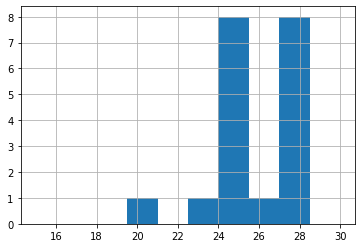

In [37]:
df.ceiling_height.hist(bins = 10, range = (15, 30))

In [38]:
def fix_height(height):
    if 21 <= height < 22:
        height = 2.15
        return height
    elif 22 <= height < 23:
        height = 2.25
        return height
    elif 23 <= height < 24:
        height = 2.35
        return height
    elif 24 <= height < 25:
        height = 2.45
        return height
    elif 25 <= height < 26:
        height = 2.55
        return height
    elif 26 <= height < 27:
        height = 2.65
        return height
    elif 27 <= height <= 28:
        height = 2.75
        return height
    else:
        return height

In [39]:
df['ceiling_height'] = df.ceiling_height.apply(fix_height)

In [40]:
df[df['ceiling_height'] >= 5].shape

(19, 22)

In [41]:
df = df[df['ceiling_height'] < 5].reset_index(drop = True)

### Таким образом, отбросили 19 строк с чрезвычайно высокими потолками

### Заменим пропуски в жилой и кухонной площади на медианные, в зависимости от общей площади

#### Сначала сделаем срез по тем строкам, где присутствуют нужные значения, а затем разделим жилую площадь на общую 

In [42]:
living = df[~df['living_area'].isna()]

In [43]:
living['living_to_total'] = living['living_area'] / living['total_area']

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [44]:
living.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,living_to_total
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,True,...,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,0.472222
1,7,3350000.0,40.4,2018-12-04,1,2.75,11,18.6,1,True,...,2,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,0.460396
2,10,5196000.0,56.0,2015-08-20,2,2.55,5,34.3,4,True,...,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,0.612500
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,True,...,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,0.320000
5,10,2890000.0,30.4,2018-09-10,1,2.65,12,14.4,5,True,...,0,городской посёлок Янино-1,NaN,NaN,0,NaN,0,NaN,55.0,0.473684


In [45]:
living.living_to_total.median()

0.567809977009036

#### Получили медианное соотношение жилой площади к общей

#### То же самое проделаем с кухней

In [46]:
kitchen = df[~df['kitchen_area'].isna()]

In [47]:
kitchen['kitchen_to_total'] = kitchen['kitchen_area'] / kitchen['total_area']

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [48]:
kitchen.kitchen_to_total.median()

0.1723076923076923

### Теперь поменяем в нашем датафрейме пропуски на полученные медианные

In [49]:
df['living_area'].isna().sum()

1860

In [50]:
df['living_area'].fillna(df['total_area']*living.living_to_total.median(), inplace = True)

In [51]:
df['kitchen_area'].isna().sum()

2163

In [52]:
df['kitchen_area'].fillna(df['total_area']*kitchen.kitchen_to_total.median(), inplace = True)

In [53]:
df['area_sum'] = df['living_area'] + df['kitchen_area']

In [54]:
difference = df[df['area_sum'] > df['total_area']]['area_sum'] / df[df['area_sum'] > df['total_area']]['total_area']

In [55]:
difference.describe()

count    110.000000
mean       1.108352
std        0.112930
min        1.002593
25%        1.027480
50%        1.069014
75%        1.150838
max        1.575758
dtype: float64

### Также сразу удалим строки, где жилая или кухонная площадь принимает слишком небольшие значения

In [56]:
df[(df.living_area < 5) | (df.kitchen_area < 3)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,area_sum
708,5,1500000.0,17.00,2017-06-07,1,2.70,9,12.000000,1,True,...,0,посёлок Шушары,18654.0,29846.0,0,NaN,0,NaN,40.0,14.929231
896,15,2600000.0,27.00,2017-07-10,1,2.75,23,18.000000,18,True,...,0,Санкт-Петербург,22131.0,17459.0,0,NaN,1,411.0,10.0,20.000000
3216,7,4440000.0,41.00,2017-07-02,1,2.70,17,3.000000,17,True,...,0,Санкт-Петербург,19272.0,13073.0,0,NaN,0,NaN,216.0,14.000000
6216,9,3100000.0,24.00,2018-06-25,2,3.00,5,16.000000,5,True,...,0,Санкт-Петербург,31960.0,4914.0,2,426.0,1,936.0,54.0,18.000000
7892,3,5967734.0,66.40,2017-02-07,2,3.00,4,44.400000,2,False,...,0,Санкт-Петербург,44870.0,20802.0,0,NaN,0,NaN,335.0,47.290000
8670,9,2200000.0,18.40,2018-08-20,1,2.52,3,14.000000,3,True,...,0,Пушкин,20710.0,30687.0,0,NaN,1,155.0,59.0,16.400000
8827,10,2450000.0,15.50,2018-08-22,1,2.55,5,10.000000,2,True,...,0,Санкт-Петербург,24326.0,4589.0,0,NaN,1,446.0,27.0,12.670769
9077,17,2920000.0,23.29,2018-12-12,1,2.80,3,21.000000,1,True,...,0,Санкт-Петербург,19506.0,4008.0,0,NaN,2,45.0,107.0,23.000000
10952,6,5350000.0,32.00,2016-04-20,1,2.60,14,16.000000,10,True,...,0,Санкт-Петербург,19008.0,3953.0,0,NaN,1,69.0,210.0,18.000000
11948,5,1900000.0,15.00,2018-06-27,1,2.50,5,8.517150,1,True,...,0,Сосновый Бор,NaN,NaN,0,NaN,0,NaN,45.0,11.101765


In [57]:
df = df[(df.living_area > 5) & (df.kitchen_area > 3)].reset_index(drop = True)

### Таким образом мы заменили 1860 и 2163 пропуска. Но в 106 строках получилось так, что сумма кухонной и жилой площадей превышает общую площадь. Это связано с тем, что мы меняли пропуски на медианы, но т.к. планировки у всех разные, отклонения имеют место быть. В целом, погрешность вышла не сильно высокая (6% по медиане).

### Проверим наш датафрейм на наличие дубликатов

In [58]:
df.duplicated().sum()

0

In [59]:
df.shape

(23491, 23)

In [60]:
23699 - 23491

208

In [61]:
23491/23699

0.9912232583653319

## Вывод:
### Были обработаны пропуски:
 - пропуски в жилой и кухонной площади, высоте потолков были заменены на медианные
 - строки с 0 в кол-ве комнат частично заменены, частично удалены
 - пропуски в балконах и кол-ве ближайших парков и водоемов заменены на 0
 - удалены строки без указания населенного пункта
 - в некоторых столбцах изменен тип данных
### Пропуски в столбцах "расстояние до аэропорта / центра", "срок размещения" были оставлены. В первом случае они, скорее всего обусловлены отсутствием аэропорта в населенном пункте. Отсутствие срока размещения, возможно, говорит о том, что публикация еще не снята. 

### Всего после предобработки наша таблица потеряла 208 строк. Это менее 1%, сравнительно небольшие потери!



# 3. Добавляем новые данные <a name="новые"></a>

### Добавим столбец с ценой за кв.м., разделив сумму на общую площадь

In [62]:
df['price_per_meter'] = df['last_price'] / df['total_area']

In [63]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,area_sum,price_per_meter
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.000000,8,True,...,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,76.000000,120370.370370
1,7,3350000.0,40.4,2018-12-04,1,2.75,11,18.600000,1,True,...,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,29.600000,82920.792079
2,10,5196000.0,56.0,2015-08-20,2,2.55,5,34.300000,4,True,...,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,42.600000,92785.714286
3,0,64900000.0,159.0,2015-07-24,3,2.60,14,90.281786,9,True,...,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0,117.678709,408176.100629
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.000000,13,True,...,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,73.000000,100000.000000


In [64]:
pd.options.display.float_format = '{:,.2f}'.format

### из столбца с датой получаем день, месяц и год, когда было выложено объявление

In [65]:
df['day'] = df['first_day_exposition'].dt.weekday_name

#### Сразу переведем в категории, чтобы далее было проще строить графики

In [66]:
day_cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [67]:
df['day'] = pd.Categorical(df['day'], categories=day_cats, ordered=True)

In [68]:
df['month'] = df['first_day_exposition'].dt.month_name()

In [69]:
month_cats = ['January', 'February', 'March', 'April', 
              'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'
             ]

In [70]:
df['month'] = pd.Categorical(df['month'], categories=month_cats, ordered=True)

In [71]:
df['year'] = df['first_day_exposition'].dt.year

In [72]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,area_sum,price_per_meter,day,month,year
0,20,"13,000,000.00",108.00,2019-03-07,3,2.70,16,51.00,8,True,...,1,482.00,2,755.00,nan,76.00,"120,370.37",Thursday,March,2019
1,7,"3,350,000.00",40.40,2018-12-04,1,2.75,11,18.60,1,True,...,0,nan,0,nan,81.00,29.60,"82,920.79",Tuesday,December,2018
2,10,"5,196,000.00",56.00,2015-08-20,2,2.55,5,34.30,4,True,...,1,90.00,2,574.00,558.00,42.60,"92,785.71",Thursday,August,2015
3,0,"64,900,000.00",159.00,2015-07-24,3,2.60,14,90.28,9,True,...,2,84.00,3,234.00,424.00,117.68,"408,176.10",Friday,July,2015
4,2,"10,000,000.00",100.00,2018-06-19,2,3.03,14,32.00,13,True,...,2,112.00,1,48.00,121.00,73.00,"100,000.00",Tuesday,June,2018


### разобьем этажи на категории "первый", "другой" и "последний"

In [73]:
df['floor'] = df.floor.where(df['floor'] != 1, 'первый')

In [74]:
df['floor'] = df.floor.where(df['floor'] != df.floors_total, 'последний')

In [75]:
df['floor'] = df.floor.where(df['floor'].isin(['первый', 'последний']), 'другой')

In [76]:
df.floor.value_counts()

другой       17273
последний     3320
первый        2898
Name: floor, dtype: int64

### Также отдельно посчитаем соотношение жилой и кухонной площади к общей.

In [77]:
df['living_to_total'] = df.living_area / df.total_area

In [78]:
df['kitchen_to_total'] = df.kitchen_area / df.total_area

In [79]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,area_sum,price_per_meter,day,month,year,living_to_total,kitchen_to_total
0,20,"13,000,000.00",108.00,2019-03-07,3,2.70,16,51.00,другой,True,...,2,755.00,nan,76.00,"120,370.37",Thursday,March,2019,0.47,0.23
1,7,"3,350,000.00",40.40,2018-12-04,1,2.75,11,18.60,первый,True,...,0,nan,81.00,29.60,"82,920.79",Tuesday,December,2018,0.46,0.27
2,10,"5,196,000.00",56.00,2015-08-20,2,2.55,5,34.30,другой,True,...,2,574.00,558.00,42.60,"92,785.71",Thursday,August,2015,0.61,0.15
3,0,"64,900,000.00",159.00,2015-07-24,3,2.60,14,90.28,другой,True,...,3,234.00,424.00,117.68,"408,176.10",Friday,July,2015,0.57,0.17
4,2,"10,000,000.00",100.00,2018-06-19,2,3.03,14,32.00,другой,True,...,1,48.00,121.00,73.00,"100,000.00",Tuesday,June,2018,0.32,0.41


In [80]:
df['living_to_total'].median()

0.567809977009036

In [81]:
df['kitchen_to_total'].median()

0.1723076923076923

In [82]:
df[(df['living_to_total'] < 0.3) | (df['kitchen_to_total'] < 0.07)].reset_index(drop = True)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,area_sum,price_per_meter,day,month,year,living_to_total,kitchen_to_total
0,6,"3,700,000.00",37.30,2017-11-02,1,2.66,26,10.60,другой,True,...,0,nan,155.00,25.00,"99,195.71",Thursday,November,2017,0.28,0.39
1,7,"45,000,000.00",161.00,2017-10-17,3,3.20,8,38.00,другой,True,...,3,99.00,541.00,88.00,"279,503.11",Tuesday,October,2017,0.24,0.31
2,2,"4,300,000.00",48.00,2019-04-04,1,2.75,22,14.00,другой,True,...,1,"1,097.00",9.00,37.80,"89,583.33",Thursday,April,2019,0.29,0.50
3,5,"7,835,000.00",52.56,2019-03-14,1,2.75,24,15.36,другой,True,...,0,nan,nan,36.27,"149,067.73",Thursday,March,2019,0.29,0.40
4,12,"7,700,000.00",58.70,2017-12-12,1,3.00,7,17.00,другой,True,...,0,nan,136.00,32.70,"131,175.47",Tuesday,December,2017,0.29,0.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,7,"5,400,000.00",43.00,2017-04-24,1,2.70,18,12.00,другой,True,...,0,nan,124.00,32.00,"125,581.40",Monday,April,2017,0.28,0.47
280,10,"1,600,000.00",92.00,2018-07-10,3,3.00,6,13.00,первый,True,...,3,167.00,3.00,23.00,"17,391.30",Tuesday,July,2018,0.14,0.11
281,1,"3,000,000.00",37.29,2019-04-15,1,2.75,19,10.08,другой,True,...,0,nan,7.00,26.96,"80,450.52",Monday,April,2019,0.27,0.45
282,7,"1,600,000.00",54.00,2016-12-26,2,2.30,1,33.00,первый,False,...,0,nan,281.00,36.50,"29,629.63",Monday,December,2016,0.61,0.06


In [83]:
df = df[(df['living_to_total'] > 0.3) & (df['kitchen_to_total'] > 0.07)]

## Вывод: 
### В таблицу были добавлены сведения о цене за кв. метр, соотношения жилой и кухонной площади к общей, а также в отдельные столбцы были вынесенны день, месяц и год создания объявления и категоризированы данные о кол-ве этажей. 
### Это поможет в дальнейшем анализе предоставленного датафрейма
### Также было дополнительно удалено 284 строки, в которых соотношение жилой/кухонной площади слишком отклонялось от медианного

# 4. Исследовательский анализ <a name="анализ"></a>

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23201 entries, 0 to 23490
Data columns (total 29 columns):
total_images            23201 non-null int64
last_price              23201 non-null float64
total_area              23201 non-null float64
first_day_exposition    23201 non-null datetime64[ns]
rooms                   23201 non-null int64
ceiling_height          23201 non-null float64
floors_total            23201 non-null int64
living_area             23201 non-null float64
floor                   23201 non-null object
is_apartment            23201 non-null bool
studio                  23201 non-null bool
open_plan               23201 non-null bool
kitchen_area            23201 non-null float64
balcony                 23201 non-null int64
locality_name           23201 non-null object
airports_nearest        17751 non-null float64
cityCenters_nearest     17773 non-null float64
parks_around3000        23201 non-null int64
parks_nearest           7873 non-null float64
ponds_around3

## 4.1. Изучим следующие параметры: площадь, цена, число комнат, высота потолков <a name="параметры"></a>

#### Посмотрим на распределение общей площади, построив гистограмму

Text(0, 0.5, 'Кол-во объявлений')

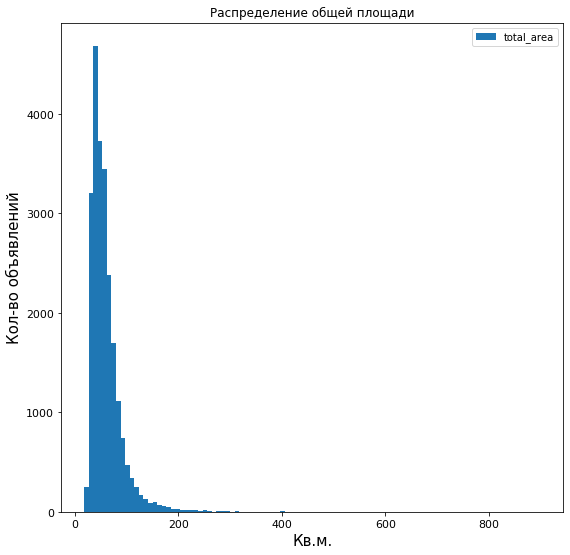

In [85]:
area_hist = df.plot(y = 'total_area', kind = 'hist', bins = 100, figsize = (9, 9), title = 'Распределение общей площади', fontsize = 11)
area_hist.set_xlabel('Кв.м.', fontsize = 15)
area_hist.set_ylabel('Кол-во объявлений', fontsize = 15)


param_dict = {'price': {'bins': 30,  'title': 'Цена', 'max_range': 100000},
'rooms': {'bins': 30,  'title': 'Комнаты', 'max_range': 10}}

for key, value in param_dict.items():
    flats_info[key].hist(bins=value['bins'], range=(0, value['max_range']))
    plt.title(value['title'])
    plt.show()

In [86]:
df.total_area.describe()

count   23,201.00
mean        59.74
std         33.40
min         17.60
25%         40.00
50%         52.00
75%         69.20
max        900.00
Name: total_area, dtype: float64

### большинство квартир имею площадь до 100 кв.м. Есть очень большие квартиры, но их не так много и скорее всего, это элитная недвижимость. Также есть небольшое кол-во очень маленьких площадей.

In [87]:
df[df.total_area == 900]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,area_sum,price_per_meter,day,month,year,living_to_total,kitchen_to_total
19376,8,"420,000,000.00",900.00,2017-12-06,12,2.80,25,409.70,последний,True,...,2,318.00,106.00,521.70,"466,666.67",Wednesday,December,2017,0.46,0.12


### посмотрим на распределение цены

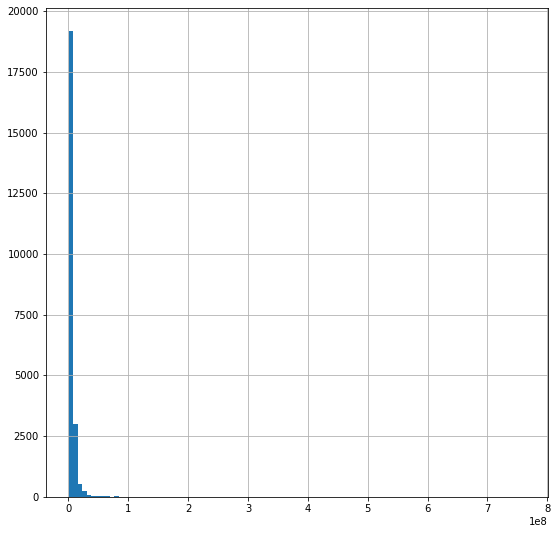

In [88]:
df.last_price.hist(bins = 100, figsize = (9, 9))

In [89]:
df.last_price.describe()

count        23,201.00
mean      6,405,090.04
std      10,291,015.66
min         430,000.00
25%       3,415,000.00
50%       4,600,000.00
75%       6,700,000.00
max     763,000,000.00
Name: last_price, dtype: float64

### для удобства разделим цену на миллион

In [90]:
df['last_price'] = df.last_price / 1000000

Text(0, 0.5, 'Кол-во объявлений')

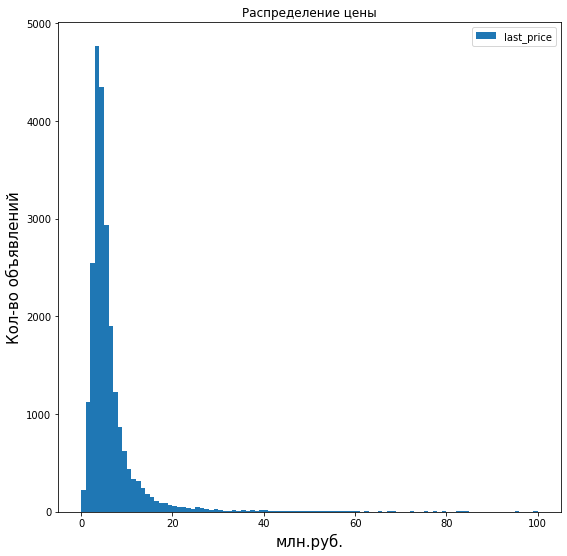

In [91]:
price_hist = df.plot(y = 'last_price', kind = 'hist', bins = 100, figsize = (9, 9), range = (0, 100), title = 'Распределение цены')
price_hist.set_xlabel('млн.руб.', fontsize = 15)
price_hist.set_ylabel('Кол-во объявлений', fontsize = 15)

In [92]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,area_sum,price_per_meter,day,month,year,living_to_total,kitchen_to_total
0,20,13.00,108.00,2019-03-07,3,2.70,16,51.00,другой,True,...,2,755.00,nan,76.00,"120,370.37",Thursday,March,2019,0.47,0.23
1,7,3.35,40.40,2018-12-04,1,2.75,11,18.60,первый,True,...,0,nan,81.00,29.60,"82,920.79",Tuesday,December,2018,0.46,0.27
2,10,5.20,56.00,2015-08-20,2,2.55,5,34.30,другой,True,...,2,574.00,558.00,42.60,"92,785.71",Thursday,August,2015,0.61,0.15
3,0,64.90,159.00,2015-07-24,3,2.60,14,90.28,другой,True,...,3,234.00,424.00,117.68,"408,176.10",Friday,July,2015,0.57,0.17
4,2,10.00,100.00,2018-06-19,2,3.03,14,32.00,другой,True,...,1,48.00,121.00,73.00,"100,000.00",Tuesday,June,2018,0.32,0.41


### В основном стоимость составляет до 15 млн

### Также посмотрим на распределение цен в зависимости от площади квартиры

In [93]:
cheap = df[df.last_price < 15]

In [94]:
cheap.total_area.describe()

count   22,058.00
mean        55.11
std         21.48
min         17.60
25%         39.60
50%         50.30
75%         65.60
max        320.00
Name: total_area, dtype: float64

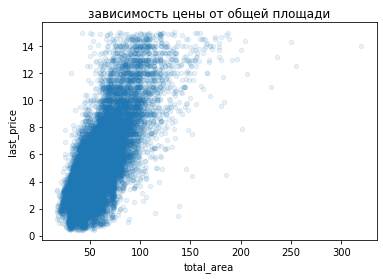

In [95]:
cheap.plot(x='total_area', y='last_price', kind='scatter', alpha=0.1, title = 'зависимость цены от общей площади')

In [96]:
df[(df['total_area'] < 65) & (df['last_price'] > 15)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,area_sum,price_per_meter,day,month,year,living_to_total,kitchen_to_total
1228,5,17.86,55.00,2016-03-15,2,3.00,7,31.23,другой,False,...,0,nan,128.00,40.71,"324,727.27",Tuesday,March,2016,0.57,0.17
1284,0,17.10,63.30,2017-12-26,2,3.10,4,38.60,последний,True,...,3,33.00,86.00,48.27,"270,142.18",Tuesday,December,2017,0.61,0.15
3698,16,17.50,60.60,2017-11-09,2,2.95,8,33.10,другой,True,...,0,nan,12.00,45.50,"288,778.88",Thursday,November,2017,0.55,0.20
4674,11,16.00,45.00,2018-07-14,2,2.80,8,29.00,другой,True,...,3,458.00,102.00,36.00,"355,555.56",Saturday,July,2018,0.64,0.16
4819,16,28.00,33.00,2019-04-29,1,3.50,5,18.74,другой,True,...,3,119.00,nan,24.42,"848,484.85",Monday,April,2019,0.57,0.17
8257,20,39.90,55.30,2017-10-26,1,3.05,6,35.00,другой,True,...,3,202.00,nan,43.00,"721,518.99",Thursday,October,2017,0.63,0.14
9620,9,19.50,49.70,2017-06-08,1,3.80,10,28.22,другой,False,...,2,99.00,90.00,36.78,"392,354.12",Thursday,June,2017,0.57,0.17
10113,9,16.00,45.00,2019-02-25,1,2.95,8,25.55,последний,True,...,0,nan,nan,33.31,"355,555.56",Monday,February,2019,0.57,0.17
10431,0,17.20,60.00,2018-01-01,1,3.00,6,34.07,другой,True,...,3,103.00,76.00,44.41,"286,666.67",Monday,January,2018,0.57,0.17
16662,12,15.70,57.70,2017-09-28,2,3.00,20,37.30,другой,True,...,1,368.00,255.00,43.60,"272,097.05",Thursday,September,2017,0.65,0.11


### В основном квартиры до 150 кв.м. стоят до 15 млн. рублей. Стоит это учитывать, ведь некоторые могут ставить цену поменьше, чтобы люди чаще натыкались на объявления.

### У нас в выборке присутствует недвижимость, стоимостью более 30 млн., но площадь у таких квартир сильно варьируется. Либо это очень элитная нежвижимость, либо ошибки при заполнении, такие строки лучше удалить. 

In [97]:
df[df.last_price > 30].sort_values('total_area')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,area_sum,price_per_meter,day,month,year,living_to_total,kitchen_to_total
8257,20,39.90,55.30,2017-10-26,1,3.05,6,35.00,другой,True,...,3,202.00,nan,43.00,"721,518.99",Thursday,October,2017,0.63,0.14
6077,13,40.00,65.30,2017-07-13,2,4.10,5,45.00,другой,True,...,1,283.00,497.00,57.00,"612,557.43",Thursday,July,2017,0.69,0.18
12804,6,39.99,67.70,2015-06-25,3,3.10,7,42.90,другой,True,...,3,202.00,nan,51.90,"590,694.24",Thursday,June,2015,0.63,0.13
8390,18,39.74,72.00,2018-09-19,2,3.05,11,40.88,другой,True,...,2,99.00,90.00,71.78,"552,000.00",Wednesday,September,2018,0.57,0.43
16594,20,35.00,74.80,2018-04-01,2,3.30,7,37.30,другой,True,...,1,616.00,180.00,49.30,"467,914.44",Sunday,April,2018,0.50,0.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7953,20,84.00,507.00,2015-12-17,5,4.45,7,301.50,последний,True,...,0,nan,"1,078.00",347.00,"165,680.47",Thursday,December,2015,0.59,0.09
5314,20,65.00,590.00,2019-02-14,15,3.50,6,409.00,другой,True,...,0,nan,14.00,509.00,"110,169.49",Thursday,February,2019,0.69,0.17
15521,20,300.00,618.00,2017-12-18,7,3.40,7,258.00,другой,True,...,2,198.00,111.00,328.00,"485,436.89",Monday,December,2017,0.42,0.11
3089,19,140.00,631.00,2019-03-30,7,2.55,5,358.29,последний,True,...,2,210.00,nan,418.29,"221,870.05",Saturday,March,2019,0.57,0.10


In [98]:
elite = df[df.last_price >= 30]

In [99]:
df[df.last_price < 1]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,area_sum,price_per_meter,day,month,year,living_to_total,kitchen_to_total
164,6,0.80,40.30,2018-06-25,2,2.80,3,22.88,первый,True,...,0,nan,81.00,29.83,"19,851.12",Monday,June,2018,0.57,0.17
245,7,0.65,31.00,2017-01-20,1,2.80,3,17.60,первый,True,...,0,nan,378.00,22.94,"20,967.74",Friday,January,2017,0.57,0.17
257,6,0.90,30.00,2017-11-21,1,2.50,5,15.00,другой,True,...,0,nan,nan,20.00,"30,000.00",Tuesday,November,2017,0.50,0.17
266,7,0.65,46.00,2018-03-15,2,2.50,5,30.00,последний,True,...,0,nan,75.00,37.00,"14,130.43",Thursday,March,2018,0.65,0.15
291,2,0.90,42.80,2017-06-14,2,2.55,5,32.00,последний,True,...,0,nan,247.00,37.00,"21,028.04",Wednesday,June,2017,0.75,0.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22864,8,0.60,31.80,2019-04-24,1,2.70,2,20.00,первый,True,...,0,nan,nan,27.00,"18,867.92",Wednesday,April,2019,0.63,0.22
22950,9,0.65,41.00,2017-10-13,2,2.80,3,28.00,первый,True,...,0,nan,14.00,34.00,"15,853.66",Friday,October,2017,0.68,0.15
23151,18,0.90,42.60,2018-02-26,2,2.70,2,28.00,первый,True,...,0,nan,219.00,37.00,"21,126.76",Monday,February,2018,0.66,0.21
23280,11,0.47,44.50,2018-07-02,2,2.70,2,28.00,последний,True,...,0,nan,298.00,35.50,"10,561.80",Monday,July,2018,0.63,0.17


### Также есть 224 объявления с подозрительно низкими ценами до 1 млн. Оставим в нашей выборке недвижимость стоимостью от 1 до 30 млн.

In [100]:
df = df[(df.last_price > 1) & (df.last_price < 30)].reset_index(drop = True)

### По кол-ву комнат все нормально, преобладают 1-2-3-хкомнатные квартиры. 

In [101]:
df.rooms.describe()

count   22,682.00
mean         2.05
std          0.99
min          1.00
25%          1.00
50%          2.00
75%          3.00
max         14.00
Name: rooms, dtype: float64

Text(0, 0.5, 'Кол-во объявлений')

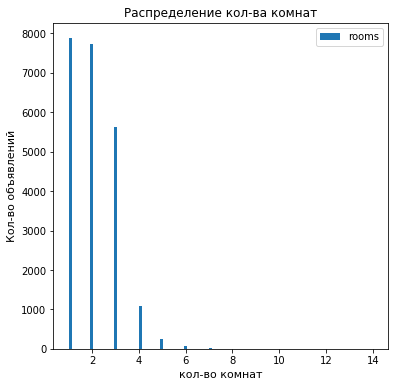

In [102]:
rooms_hist = df.plot(y = 'rooms', kind = 'hist', bins = 100, figsize = (6, 6), title = 'Распределение кол-ва комнат')
rooms_hist.set_xlabel('кол-во комнат', fontsize = 11)
rooms_hist.set_ylabel('Кол-во объявлений', fontsize = 11)

### Взглянем на высоту потолков. 

Text(0, 0.5, 'Кол-во объявлений')

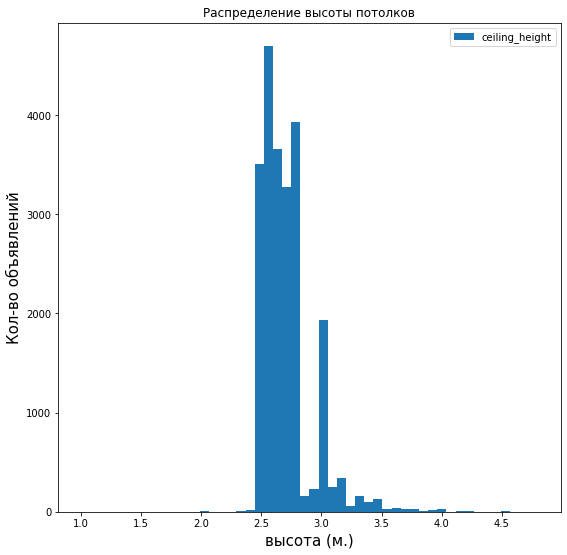

In [103]:
ceiling_hist = df.plot(y = 'ceiling_height', kind = 'hist', bins = 50, figsize = (9, 9), title = 'Распределение высоты потолков')
ceiling_hist.set_xlabel('высота (м.)', fontsize = 15)
ceiling_hist.set_ylabel('Кол-во объявлений', fontsize = 15)

In [104]:
df.ceiling_height.describe()

count   22,682.00
mean         2.70
std          0.22
min          1.00
25%          2.55
50%          2.65
75%          2.75
max          4.80
Name: ceiling_height, dtype: float64

### Перед этим мы уже избавились от слишком высоких потолков, больших выбросов нет

In [105]:
df[df.ceiling_height < 2]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,area_sum,price_per_meter,day,month,year,living_to_total,kitchen_to_total
5470,5,1.50,42.80,2017-08-14,2,1.20,2,27.50,первый,True,...,0,nan,248.00,32.70,"35,046.73",Monday,August,2017,0.64,0.12
16209,5,4.10,40.00,2017-10-17,1,1.75,37,17.40,другой,True,...,3,80.00,71.00,25.74,"102,500.00",Tuesday,October,2017,0.43,0.21
21614,16,6.00,55.00,2018-10-31,2,1.00,12,32.40,другой,True,...,2,289.00,13.00,42.40,"109,090.91",Wednesday,October,2018,0.59,0.18


In [106]:
df = df[df.ceiling_height > 2].reset_index(drop = True)

## Изучим время продажи квартиры.

### Судя по пропускам в 'days_exposition', не все квартиры из нашего датафрейма проданы. Сделаем срез по уже проданным квартирам, чтобы изучить время продажи

In [107]:
sold = df[~df.days_exposition.isna()]

In [108]:
sold.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19679 entries, 1 to 22666
Data columns (total 29 columns):
total_images            19679 non-null int64
last_price              19679 non-null float64
total_area              19679 non-null float64
first_day_exposition    19679 non-null datetime64[ns]
rooms                   19679 non-null int64
ceiling_height          19679 non-null float64
floors_total            19679 non-null int64
living_area             19679 non-null float64
floor                   19679 non-null object
is_apartment            19679 non-null bool
studio                  19679 non-null bool
open_plan               19679 non-null bool
kitchen_area            19679 non-null float64
balcony                 19679 non-null int64
locality_name           19679 non-null object
airports_nearest        15289 non-null float64
cityCenters_nearest     15308 non-null float64
parks_around3000        19679 non-null int64
parks_nearest           6603 non-null float64
ponds_around3

Text(0, 0.5, 'Кол-во объявлений')

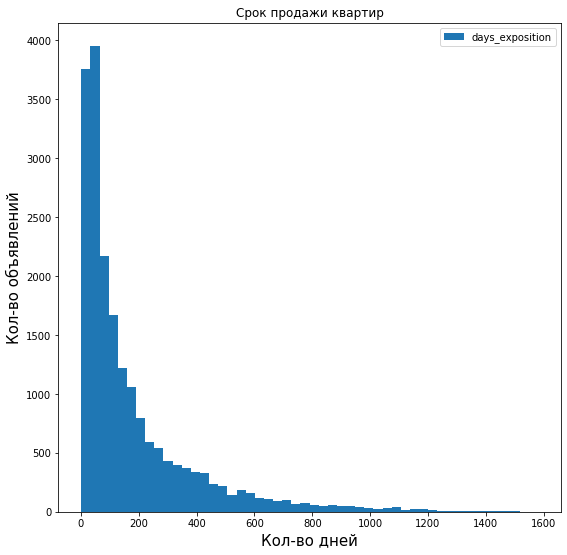

In [109]:
sold_days_hist = sold.plot(y = 'days_exposition', kind = 'hist', bins = 50, figsize = (9, 9), title = 'Срок продажи квартир')
sold_days_hist.set_xlabel('Кол-во дней', fontsize = 15)
sold_days_hist.set_ylabel('Кол-во объявлений', fontsize = 15)

In [110]:
sold['days_exposition'].describe()

count   19,679.00
mean       179.76
std        218.57
min          1.00
25%         45.00
50%         95.00
75%        229.00
max      1,580.00
Name: days_exposition, dtype: float64

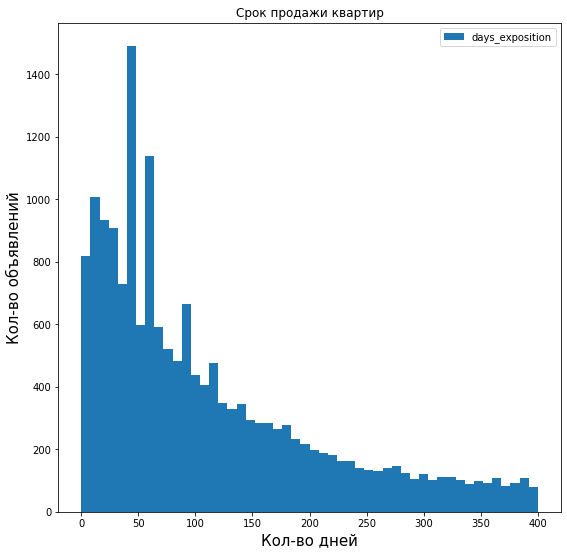

In [111]:
sold_days_hist2 = sold.plot(y = 'days_exposition', kind = 'hist', bins = 50, figsize = (9, 9), range = (0, 400), title = 'Срок продажи квартир')
sold_days_hist2.set_xlabel('Кол-во дней', fontsize = 15)
sold_days_hist2.set_ylabel('Кол-во объявлений', fontsize = 15)
plt.show()

In [112]:
df[df['days_exposition'] < 10]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,area_sum,price_per_meter,day,month,year,living_to_total,kitchen_to_total
9,9,3.30,44.00,2018-08-27,2,2.55,5,31.00,другой,False,...,0,nan,7.00,37.00,"75,000.00",Monday,August,2018,0.70,0.14
50,7,4.30,39.10,2017-11-10,1,2.75,25,15.40,другой,True,...,0,nan,6.00,30.90,"109,974.42",Friday,November,2017,0.39,0.40
59,0,4.80,78.60,2017-09-17,3,2.80,9,48.80,другой,True,...,0,nan,5.00,60.70,"61,068.70",Sunday,September,2017,0.62,0.15
91,3,3.50,29.50,2019-04-26,1,2.50,5,15.60,другой,True,...,0,nan,4.00,21.10,"118,644.07",Friday,April,2019,0.53,0.19
97,16,3.80,38.60,2018-02-22,1,2.55,9,18.00,другой,True,...,0,nan,8.00,26.40,"98,445.60",Thursday,February,2018,0.47,0.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22488,12,8.30,62.60,2017-02-15,2,2.70,16,32.90,другой,False,...,0,nan,7.00,44.20,"132,587.86",Wednesday,February,2017,0.53,0.18
22567,10,3.50,43.50,2017-12-05,2,2.50,9,27.00,другой,True,...,0,nan,6.00,33.20,"80,459.77",Tuesday,December,2017,0.62,0.14
22577,0,2.85,68.00,2018-07-29,1,3.00,5,41.00,другой,True,...,3,327.00,4.00,51.00,"41,911.76",Sunday,July,2018,0.60,0.15
22617,9,5.70,45.60,2019-01-09,1,2.75,16,18.70,другой,True,...,0,nan,8.00,36.30,"125,000.00",Wednesday,January,2019,0.41,0.39


### Среднее время продажи 178 дней, медианное - 94 дня. Больше 400 дней это уже определенно очень долго. При этом, есть крайне быстрые продажи (до 10 дней), их кол-во составляет около 1000. Возможно, были очень хорошие предложения. 

### Пиковые значения на 45, 60 и 90 днях могут быть обусловлены либо тем, что за этот срок чаще всего находится покупатель, либо владелец объявления просто снимает его, чтобы разместить заново и поднять выше в поисковом запросе. Хотя, если бы одни и те же объявления выкладывались заново несколько раз, у нас бы были обнаружены дубликаты не этапе предобработки. 

### Посмотрим, какие по площади квартиры продаются быстрее

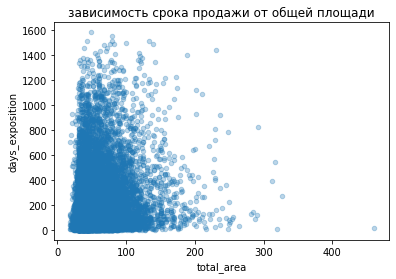

In [113]:
sold.plot(x='total_area', y='days_exposition', kind='scatter', alpha=0.3, title = 'зависимость срока продажи от общей площади')
plt.show()

### Из графика выше видно, что квартиры до 150 кв.м. продаются в основном в течение года

## 4.2. Теперь изучим, какие факторы больше всего влияют на стоимость квартиры.  <a name="факторы"></a>

### Посмотрим зависимость цены от площади, числа комнат, удаленности от центра. Для этого построим графики и матрицу корреляции

In [114]:
factors = df[['last_price','total_area', 'rooms', 'cityCenters_nearest']]

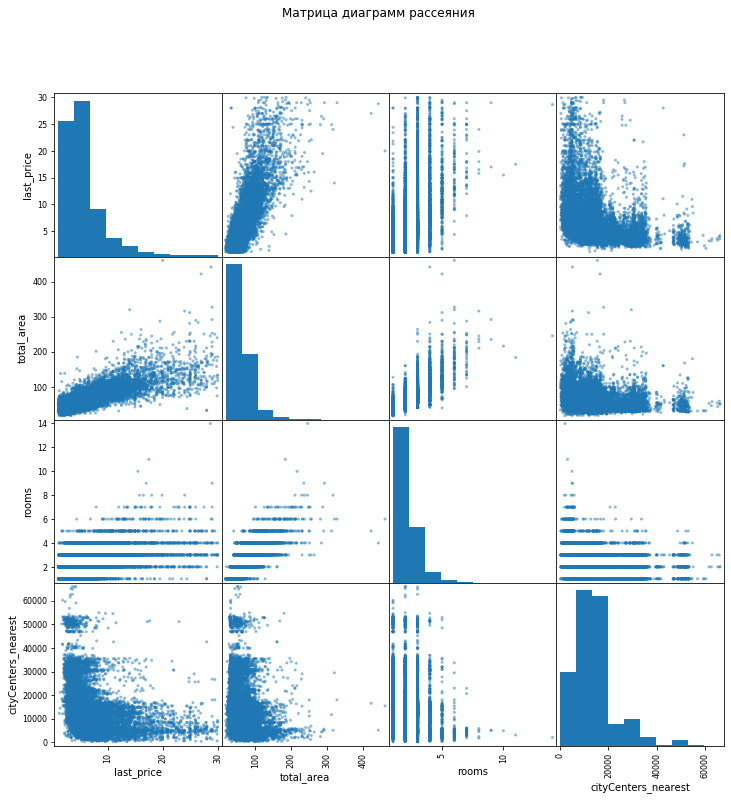

In [115]:
mat = pd.plotting.scatter_matrix(factors, figsize = (12,12))
plt.suptitle('Матрица диаграмм рассеяния')
plt.show()

In [116]:
factors.corr()

,last_price,total_area,rooms,cityCenters_nearest
last_price,1.00,0.79,0.52,-0.34
total_area,0.79,1.00,0.79,-0.22
rooms,0.52,0.79,1.00,-0.16
cityCenters_nearest,-0.34,-0.22,-0.16,1.00


### Цена очень зависит от общей площади, и, как следствие - кол-ва комнат. Близость к центру тоже играет роль, но не такую большую, как ожидалось.

### Теперь посмотрим, как влияет этаж на стоимость. Обычно, цена различается для первых и последних этажей, поэтому мы предварительно категоризировали наши данные по этому признаку

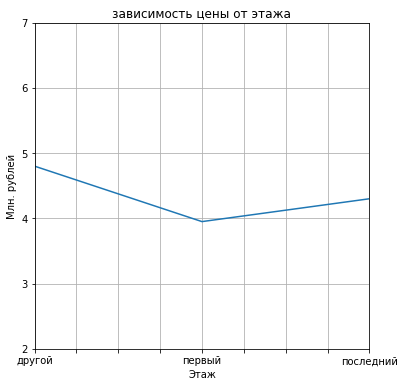

In [117]:
floor_price = df.groupby('floor')['last_price'].median().plot(figsize=(6, 6), grid=True, title = 'зависимость цены от этажа').set_ylim(2, 7) 

plt.xlabel('Этаж')
plt.ylabel('Млн. рублей')
plt.show()

### Все-таки, последние этажи не самые дорогие, видимо, есть ряд более важных факторов

## Теперь посмотрим, как зависит цена от времени, когда было опубликовано объявление

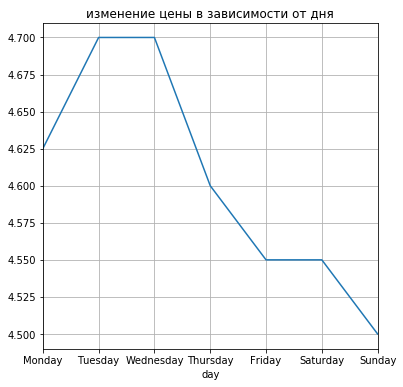

In [118]:
dayplot = df.groupby('day')['last_price'].median().plot(figsize=(6, 6), grid=True, title = 'изменение цены в зависимости от дня')

### на выходных, почему-то средняя стоимость снижается. Но разброс не очень высокий, все-таки день недели не особо влияет на итоговую цену

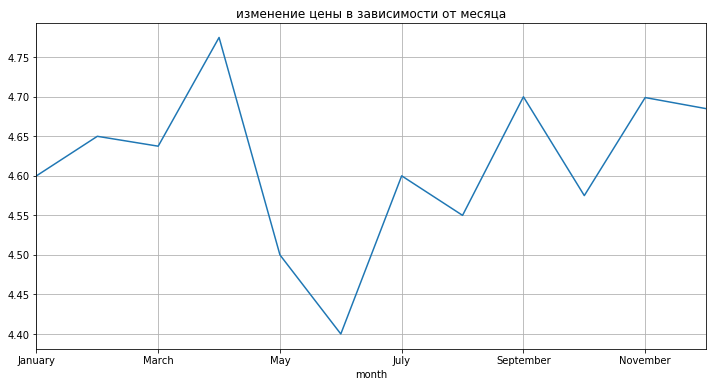

In [119]:
monthplot = df.groupby('month')['last_price'].median().plot(figsize=(12, 6), grid=True, title = 'изменение цены в зависимости от месяца')

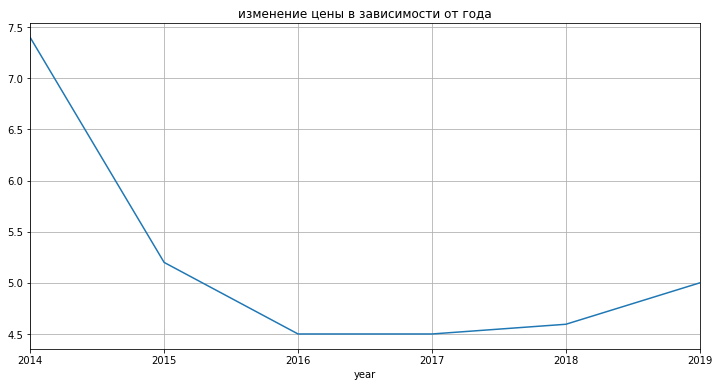

In [120]:
yearplot = df.groupby('year')['last_price'].median().plot(figsize=(12, 6), grid=True, title = 'изменение цены в зависимости от года')

### А вот тут уже интересно: с 2015 по 2018 очень просела цена. 

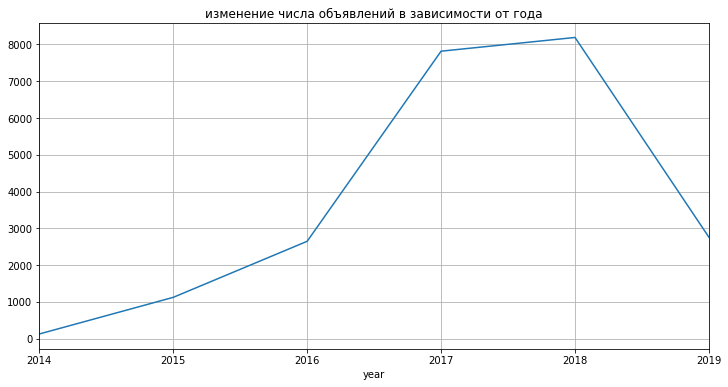

In [121]:
df.groupby('year')['last_price'].count().plot(figsize=(12, 6), grid=True, title = 'изменение числа объявлений в зависимости от года')

### Посмотрев на кол-во объявлений, сделанных за этот период, можно предположить, что цена снизилась за счет большой конкуренции, т.к. предложение очень увеличилось. 

## 4.3. Выберем 10 населённых пунктов с наибольшим числом объявлений и посчитаем цену за кв.м. <a name="пункты"></a>

In [122]:
top10 = df.locality_name.value_counts().head(10)

In [123]:
top10.sum()

18236

In [124]:
top10names = top10.index

In [125]:
top_cities = df.query('locality_name in @top10names')

In [126]:
top_cities_grouped = top_cities.groupby('locality_name')['price_per_meter'].mean()

In [127]:
top_cities_grouped.sort_values()

locality_name
Выборг               58,841.09
Всеволожск           68,724.54
Гатчина              68,838.63
Колпино              75,435.36
посёлок Шушары       78,554.91
посёлок Мурино       85,322.47
посёлок Парголово    90,066.47
деревня Кудрово      92,379.99
Пушкин              103,271.85
Санкт-Петербург     110,319.94
Name: price_per_meter, dtype: float64

### Самый дорогой кв. метр в Петербурге. Почти в 2 раза дешевле в Выборге. 

## 4.4. Посмотрим поближе на рынок недвижимости в самом Санкт-Петербурге. <a name="питер"></a>

In [128]:
stp = df.query('locality_name == "Санкт-Петербург"')

#### Так как расстояние до центра указано не везде, а предугадать его так, чтобы не получить большую погрешность не представляется возможным, сделаем срез по тем данным, где есть нужная информация

In [129]:
stp = stp[~stp['cityCenters_nearest'].isna()]

In [130]:
stp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15022 entries, 0 to 22666
Data columns (total 29 columns):
total_images            15022 non-null int64
last_price              15022 non-null float64
total_area              15022 non-null float64
first_day_exposition    15022 non-null datetime64[ns]
rooms                   15022 non-null int64
ceiling_height          15022 non-null float64
floors_total            15022 non-null int64
living_area             15022 non-null float64
floor                   15022 non-null object
is_apartment            15022 non-null bool
studio                  15022 non-null bool
open_plan               15022 non-null bool
kitchen_area            15022 non-null float64
balcony                 15022 non-null int64
locality_name           15022 non-null object
airports_nearest        15001 non-null float64
cityCenters_nearest     15022 non-null float64
parks_around3000        15022 non-null int64
parks_nearest           6880 non-null float64
ponds_around3

#### Переведем расстояние до центра в километры, округлим и посчитаем цену за километр

In [131]:
stp['to_center'] = stp['cityCenters_nearest'] / 1000

In [132]:
stp['to_center'] = stp['to_center'].astype('int')

In [133]:
stp['price_per_km'] = stp['last_price'] / stp['to_center']

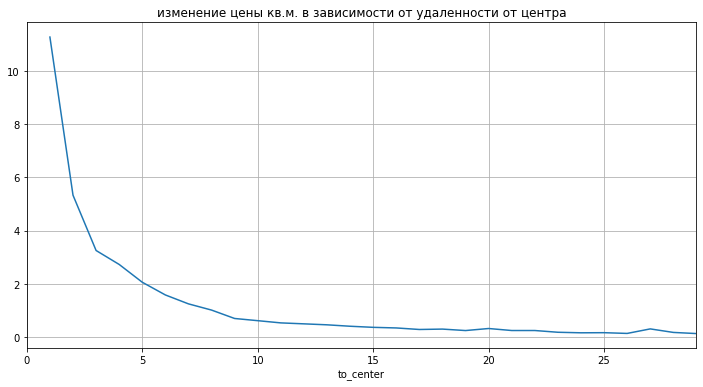

In [134]:
stp.groupby('to_center')['price_per_km'].mean().plot(figsize=(12, 6), grid=True, title = 'изменение цены кв.м. в зависимости от удаленности от центра')

### Очевидно, что чем дальше от центра, тем дешевле. Судя по графику, самый центр в радиусе 5 км

## Посмотрим, как меняются основные параметры в зависимости от того, находится квартира ближе к центру, или дальше. И как при этом различается влияние факторов на стоимость квартир.

In [135]:
stp_center = stp.query('to_center <= 5').reset_index(drop = True)

In [136]:
stp_center[['total_area', 'last_price', 'rooms', 'ceiling_height']].agg(['mean', 'median', 'max', 'min'])

,total_area,last_price,rooms,ceiling_height
mean,85.37,10.54,2.81,2.99
median,77.76,8.99,3.00,3.00
max,441.98,29.90,14.00,4.80
min,17.60,2.18,1.00,2.40


In [137]:
stp[['total_area', 'last_price', 'rooms', 'ceiling_height']].agg(['mean', 'median', 'max', 'min'])

,total_area,last_price,rooms,ceiling_height
mean,61.32,6.83,2.13,2.72
median,54.20,5.45,2.00,2.70
max,460.80,30.00,14.00,4.80
min,17.60,1.20,1.00,2.25


### В центре квартиры предлагают в основном побольше, и в полтора раза дороже. Также, в центре преобладают трехкомнатные квартиры, тогда как в целом по городу - двухкомнатные.

In [138]:
stp_center[['last_price', 'floor', 'rooms', 'cityCenters_nearest', 'year']].corr()

,last_price,rooms,cityCenters_nearest,year
last_price,1.00,0.47,-0.03,0.00
rooms,0.47,1.00,-0.10,-0.06
cityCenters_nearest,-0.03,-0.10,1.00,0.03
year,0.00,-0.06,0.03,1.00


In [139]:
stp[['last_price', 'floor', 'rooms', 'cityCenters_nearest', 'year']].corr()

,last_price,rooms,cityCenters_nearest,year
last_price,1.00,0.55,-0.41,-0.04
rooms,0.55,1.00,-0.26,-0.06
cityCenters_nearest,-0.41,-0.26,1.00,0.08
year,-0.04,-0.06,0.08,1.00


In [140]:
stp_year_medianprice = stp.groupby('year')['last_price'].agg(['median', 'count'])

In [141]:
stp_year_medianprice 

,median,count
year,,
2014,9.94,90
2015,5.95,792
2016,5.30,1765
2017,5.21,5281
2018,5.40,5205
2019,5.80,1889


In [142]:
stpcenter_year_medianprice = stp_center.groupby('year')['last_price'].agg(['median', 'count'])

In [143]:
stpcenter_year_medianprice

,median,count
year,,
2014,16.60,16
2015,9.90,228
2016,8.98,354
2017,8.75,905
2018,8.99,761
2019,9.50,263


In [144]:
joined = stp_year_medianprice.join(stpcenter_year_medianprice, rsuffix = '_center')

In [145]:
joined

,median,count,median_center,count_center
year,,,,
2014,9.94,90,16.60,16
2015,5.95,792,9.90,228
2016,5.30,1765,8.98,354
2017,5.21,5281,8.75,905
2018,5.40,5205,8.99,761
2019,5.80,1889,9.50,263


In [146]:
stpcenter_year_medianprice / stp_year_medianprice 

,median,count
year,,
2014,1.67,0.18
2015,1.66,0.29
2016,1.70,0.20
2017,1.68,0.17
2018,1.66,0.15
2019,1.64,0.14


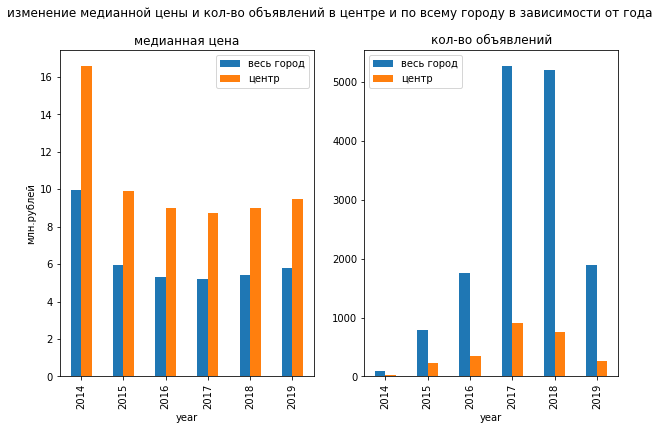

In [147]:
fig, axes = plt.subplots(nrows=1, ncols=2)
ax1 = joined[["median","median_center"]].plot(ax=axes[0], kind='bar', figsize = (10,6), title = 'медианная цена')
ax2 = joined[["count","count_center"]].plot(ax=axes[1], kind='bar', figsize = (10,6), title = 'кол-во объявлений')
ax1.legend(['весь город', 'центр'])
ax1.set_ylabel('млн.рублей')
ax2.legend(['весь город', 'центр'])

plt.suptitle('изменение медианной цены и кол-во объявлений в центре и по всему городу в зависимости от года')
plt.show()

### Посмотрев на динамику изменения цены и кол-ва объявлений в зависимости от года, можно сделать вывод, что цена на квартиры в центре стабильно на 60% выше, чем по городу. С 2015 по 2017 год кол-во объявлений стабильно росло, наверное, по причине раскрутки платформы. С 2018 года предложение начинает падать и в 2019 году наблюдается резкий спад. 

### В целом, основным фактором, влияющим на цену, где бы ни находилась квартира, остается общая площадь. Чуть меньше влияет удаленность от центра.

# 5. Общий вывод <a name="вывод"></a>

### В ходе исследования были изучены данные из архива объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Перед анализом были обработаны пропуски, некоторые значения были заменены на медианные, небольшая часть выборки была удалена.

### Основным фактором, влияющим на стоимость квартиры является, непосредственно, площадь квартиры и удаленность от центра. Причем как от центра города, так и удаленность от самого города. Соответственно, самые дорогие квартиры представлены в центре Санкт-Петербурга, где стоимость варьируется вокруг 8.5 миллионов, в то время как в среднем по городу преобладают квартиры стоимостью в районе 5-ти миллионов. 

### Исходя из представленной выборки можно сделать вывод, что:
- нормальное распределение площади соствляет до 150 кв.м., все, что выше - либо элитная недвижимость, либо ложные объявления
- высота потолков варьируется от 2.5 до 3 метров. При этом есть объявления с аномально высокими потолками, вероятно, это ошибка заполнения
- кол-во комнат в предлагаемых квартирах составляет от 1 до 4. Опять же, если больше - либо элитная недвижимость, либо ложные объявления
- ценник на квартиры варьируется до 15 млн. рублей
- квартиры продаются в основном в течение года

